In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
%matplotlib inline

In [2]:
# Пользовательские настройки
pd.set_option("display.max_columns", None)
plt.style.use("seaborn-v0_8-whitegrid")

## **Загрузка данных**

In [3]:
df = pd.read_csv("data.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


В таблице имеются следующие поля:
- customerID - уникальный идентификатор клиента
- gender - пол клиента
- SeniorCitizen - достиг ли клиент возраста 65 (0 - нет, 1 - да)
- Partner - есть ли партнер у клиента (да/нет)
- Dependents - есть ли у клиента дети (да/нет)
- tenure - сколько месяцев пользователь является (являлся) клиентом
- PhoneService - подключен ли у клиента тариф "звонки" (да/нет)
- MultipleLines - есть ли у клиента поддержка нескольких звонков одновременно (да/нет/не подключен тариф звонки)
- InternetService - тип подключенного интернета, если есть (DSL/Fiber optic/нет)
- OnlineSecurity - подключен ли у клиента тариф "защита в сети" (да/нет/нет тарифа интернет)
- OnlineBackup - подключен ли у клиента тариф "облачная резервная копия" (да/нет/нет тарифа интернет)
- DeviceProtection - подключен ли у клиента тариф "защита устройства" (да/нет/нет тарифа интернет)
- TechSupport - подключен ли у клиента тариф "техподдержка" (да/нет/нет тарифа интернет)
- StreamingTV - подключен ли у клиента тариф "телевидение" (да/нет/нет тарифа интернет)
- StreamingMovies - подключен ли у клиента тариф "фильмы" (да/нет/нет тарифа интернет)
- Contract - тип контракта (ежемесячный, годовой, двухгодовой)
- PaperlessBilling - безналичный расчет (да/нет)
- PaymentMethod - тип оплаты (электронный чек, бумажный чек, перевод через банк, кредитная карта)
- MonthlyCharges - сумма, списываемая ежемесячно
- TotalCharges - общая сумма которую принес клиент
- Churn - ушел клиент или нет (да/нет)

## **Разведочный анализ**

Прежде, чем переходить к статистическому анализу причин оттока, в первую очередь проведем разведочный анализ имеющихся данных с целью, чтобы найти взаимосвязи, аномалии и создать гипотезы, которые в дальнейшем мы проверим.\
Оценим отток клиентов за весь период сбора имеющихся данных.

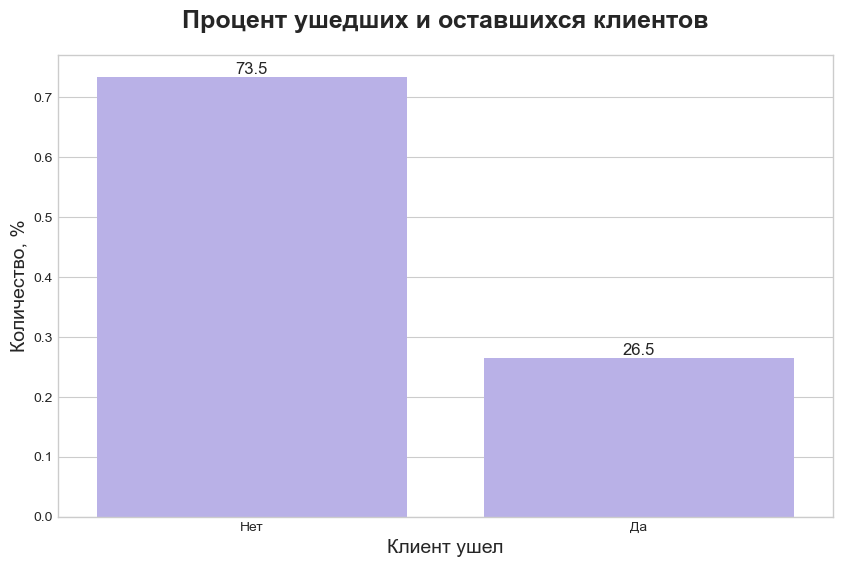

In [4]:
df0 = df["Churn"].value_counts(normalize=True)

plt.figure(figsize=(10, 6))
ax = sns.barplot(df0, color="#B2A8F0")

for container in ax.containers:
    ax.bar_label(container, fmt=lambda x: np.round(x * 100, 1), label_type="edge", size=12, weight="normal")

plt.title("Процент ушедших и оставшихся клиентов", x=0.5, y=1.04, size=18, weight="bold")
plt.xlabel("Клиент ушел", size=14)
plt.ylabel("Количество, %", size=14)
plt.xticks(ticks=["No", "Yes"], labels=["Нет", "Да"], size=10)
plt.yticks(size=10)

plt.show()

Исследуем распределение двух групп клиентов (остался/ушел) по их продолжительности нахождения в компании.

In [5]:
df["years_in_company"] = pd.cut(x=df["tenure"], bins=np.arange(0, 73, 12), include_lowest=True, labels=np.arange(0, 6, 1)).astype(int)

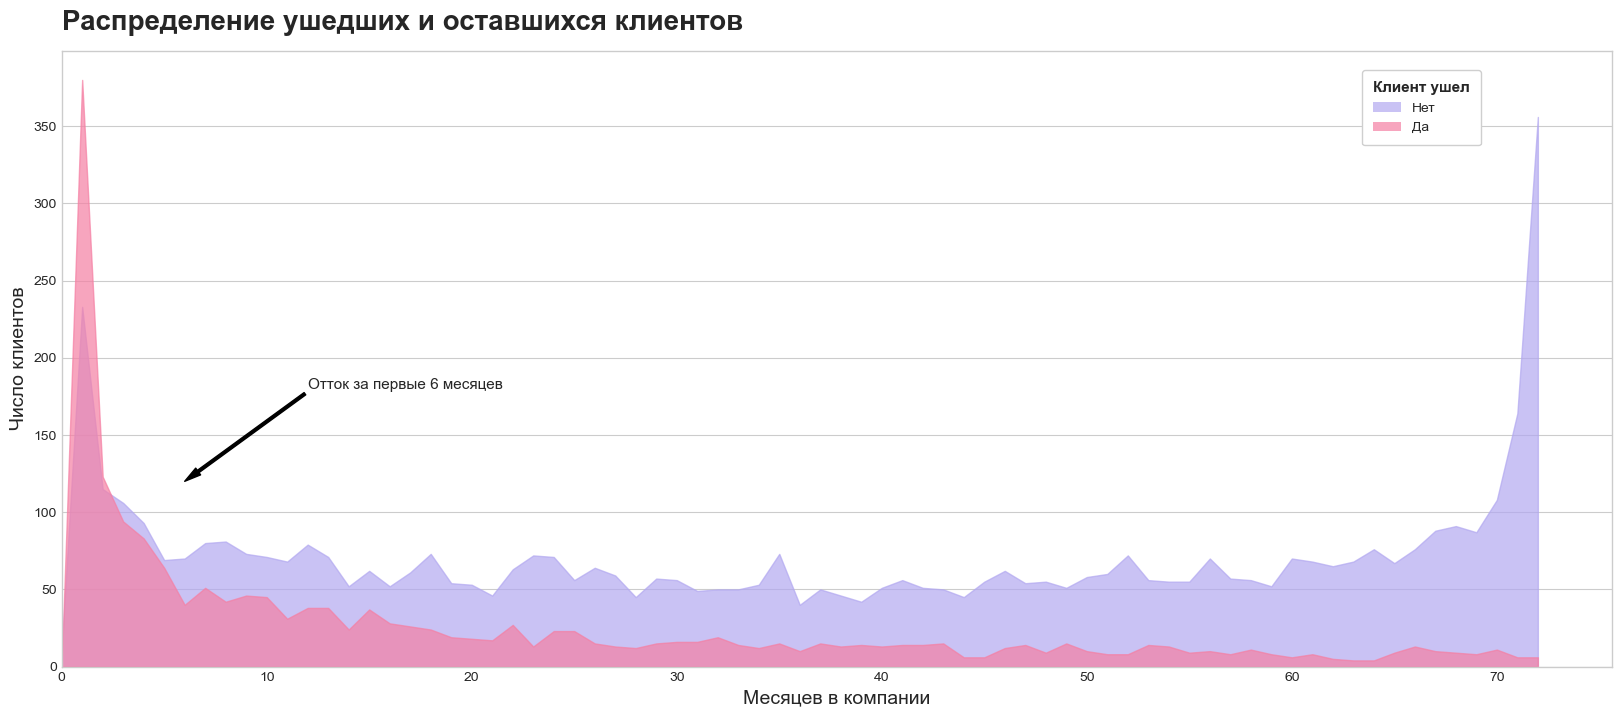

In [6]:
# Данные для визуализации
df1 = pd.pivot(
    df.groupby(["tenure", "Churn"])["customerID"].count().reset_index(),
    values="customerID",
    index="tenure",
    columns="Churn"
).fillna(0)

# Пользовательские цвета
c1 = "#B2A8F0"
c2 = "#F57FA3"

fig, axs = plt.subplot_mosaic([[0]], figsize=(20, 8))

# ПЕРВЫЙ ГРАФИК: динамика оттока
axs[0].plot(df1.index, df1["No"], linewidth=0)
axs[0].plot(df1.index, df1["Yes"], linewidth=0)
axs[0].fill_between(df1.index, df1["No"], alpha=0.7, color=c1)
axs[0].fill_between(df1.index, df1["Yes"], alpha=0.7, color=c2)
axs[0].set_xlim(0)
axs[0].set_ylim(0)

# Заголовки и настройки осей
axs[0].set_title("Распределение ушедших и оставшихся клиентов", loc="left", y=1.02, size=20, weight="bold")
axs[0].set_xlabel("Месяцев в компании", size=14)
axs[0].set_ylabel("Число клиентов", size=14)

# Легенда
custom_patches = [Patch(facecolor=c1, label="Нет", alpha=0.7), Patch(facecolor=c2, label="Да", alpha=0.7)]
axs[0].legend(
    handles=custom_patches,
    bbox_to_anchor=(0.92, 0.98),
    title="Клиент ушел",
    title_fontproperties={"weight": "bold", "size": 11},
    frameon=True,
    framealpha=1,
    facecolor="white",
    edgecolor="#CFCFCF",
    alignment="left",
    borderpad=0.8,
)

# Стрелка
axs[0].annotate(
    "Отток за первые 6 месяцев",
    xy=(6, 120),
    xytext=(12, 180),
    size=11,
    arrowprops={"facecolor": "black", "width": 2, "headwidth": 6}
)

plt.grid(False, axis="x")
plt.show()

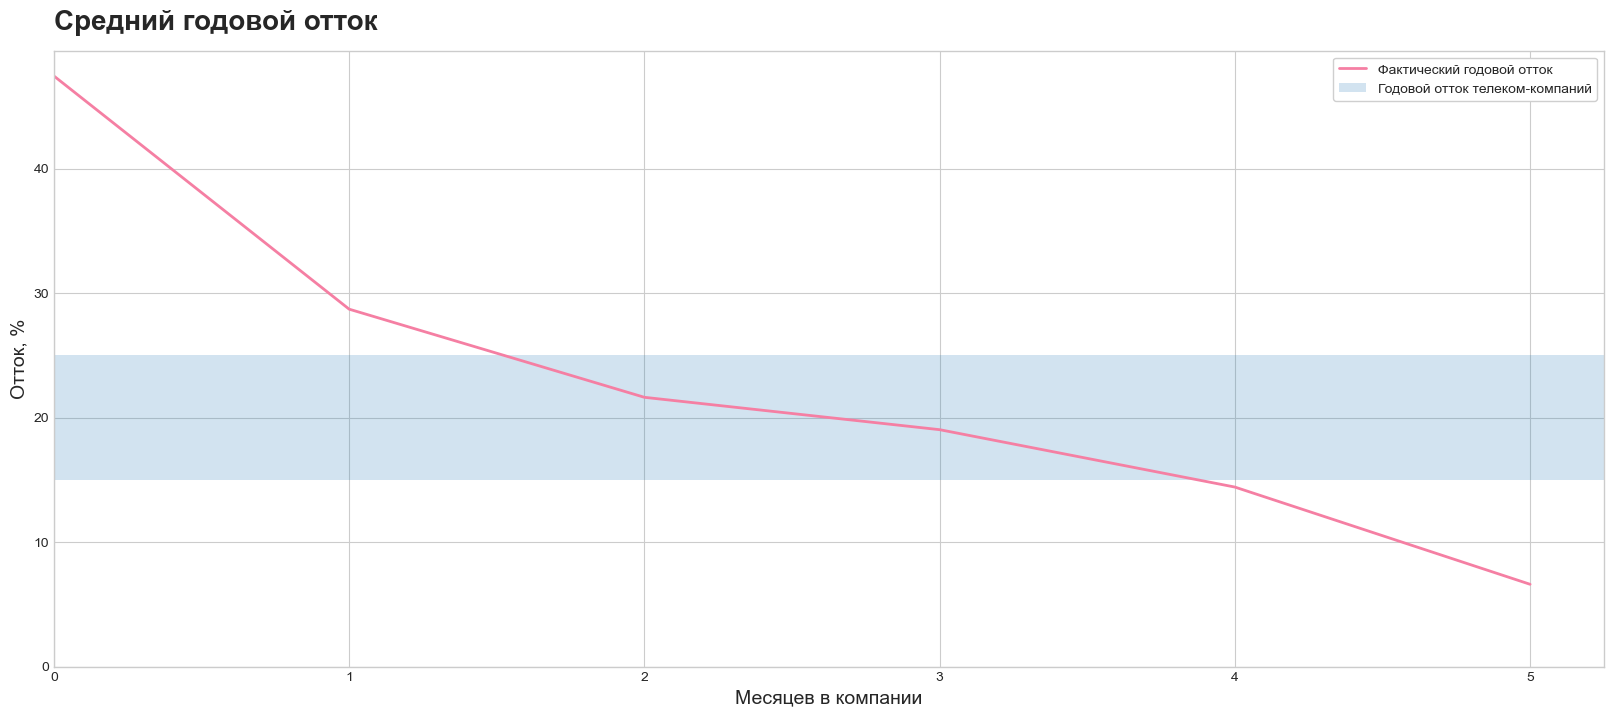

In [7]:
# Данные для визуализации
df2 = (
    pd.pivot(
        df.groupby(["years_in_company", "Churn"])["customerID"].count().reset_index(),
        values="customerID",
        index="years_in_company",
        columns="Churn"
    )
    .assign(yearly_churn=lambda x: (x["Yes"] / x.sum(axis=1) * 100).round(2))
)

fig, ax = plt.subplots(figsize=(20, 8))

# ВТОРОЙ ГРАФИК: 
ax.plot(df2.index, df2["yearly_churn"], color=c2, linewidth=2, label="Фактический годовой отток")
ax.axhspan(15, 25, alpha=0.2, label="Годовой отток телеком-компаний")
ax.set_xlim(0)
ax.set_ylim(0)

# Заголовки и настройка осей
ax.set_title("Средний годовой отток", loc="left", y=1.02, size=20, weight="bold")
ax.set_xlabel("Месяцев в компании", size=14)
ax.set_ylabel("Отток, %", size=14)

# # Легенда
ax.legend(
    frameon=True,
    framealpha=1,
    facecolor="white",
    edgecolor="#CFCFCF",
    borderpad=0.4,
)

plt.show()

In [8]:
# fig, ax = plt.subplots(figsize=(20, 8))

# # ВТОРОЙ ГРАФИК: 3-месячное скользящее среднее оттока по длительности пребывания в компании
# ax.plot(plot_data.index, plot_data["roll_avg"], color=c2, label="3-месячное скользящее среднее")
# # ax.axhspan(15, 25, alpha=0.2, label="Годовой отток телеком-компаний")
# ax.set_xlim(0)
# ax.set_ylim(0)

# # Заголовки и настройка осей
# ax.set_title("Средний отток", loc="left", y=1.02, size=16, weight="bold")
# ax.set_xlabel("Месяцев в компании", size=14)
# ax.set_ylabel("Отток, %", size=14)

# # Легенда
# ax.legend(
#     frameon=True,
#     framealpha=1,
#     facecolor="white",
#     edgecolor="#CFCFCF",
#     borderpad=0.4,
# )

# plt.show()

Ситуация после ~1.5 года заметно улучшается, а отток после 4 года становится ниже среднего\
Причины: 
- многие клиенты плохо адаптируются 
- ухудшение качества услуг (звонки, интернет, безопасность, неудобство оплаты и тд), наценка тарифов, поэтому новых клиентов сложнее удержать

In [9]:
# Отток в течение первых 6 месяцев
df[df["tenure"] <= 6]["Churn"].value_counts(normalize=True)

Churn
Yes    0.529372
No     0.470628
Name: proportion, dtype: float64

**РЕЗУЛЬТАТ**

1) **Отток за весь период**\
*Согласно статистике, в США за 5-6 лет у телеком-компаний отток обычно варьируется в диапазоне 25-35% в связи с высокой конкуренцией на рынке. В Telco отток за весь период (72 месяца - 6 лет) составил 26,5%, что свидетельствует о нормальной средней динамике оттока клиентов в данной компании*.
2) **Отток за первое полугодие**\
*В среднем отток клиентов в течение первых 6 месяцев составляет 30-45% - такие клиенты отваливаются по причине неоправданных ожиданий. В случае Telco за первое полугодие "отвалилось" больше половины клиентов (53%).*

В среднем, динамика оттока является приемлемой, но значимое количество клиентов уходит в течение первого полугодия. Это сигнализирует о проблемах во время адаптационного периода, неудовлетворенностью качеством услуг и тарифов - клиенты не видят в них ценности в долгосрочной перспективе.

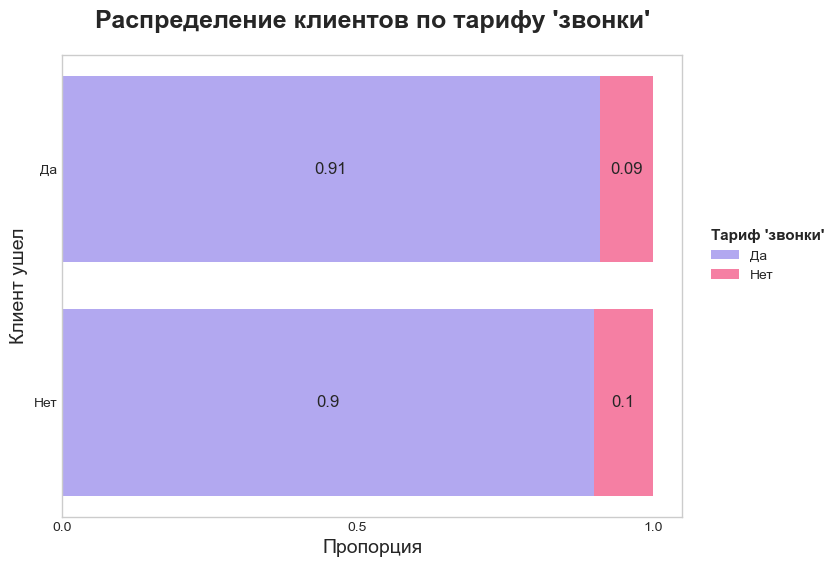

In [10]:
# Данные для визуализации
df3 = pd.pivot(
    (
        df
        .groupby(["Churn", "PhoneService"])
        ["customerID"]
        .count()    
        .groupby(level=0)
        .transform(lambda x: (x / x.sum()).round(2))
        .reset_index()
    ),
    index="PhoneService",
    columns="Churn",
    values="customerID"
)

# Настройка графика
left = np.array([0.0, 0.0])
churn = ["Нет", "Да"]
fig, ax = plt.subplots(figsize=(8, 6))
for ps, c in zip(["Yes", "No"], [c1, c2]):
    a = df3.loc[ps].to_numpy()
    p = ax.barh(churn, a, left=left, color=c, label=ps)
    left += a
    ax.bar_label(p, label_type="center", size=12)

# Заголовки и настройки осей
plt.title("Распределение клиентов по тарифу 'звонки'", x=0.5, y=1.04, size=18, weight="bold")
plt.xlabel("Пропорция", size=14)
plt.ylabel("Клиент ушел", size=14)
plt.xticks([0, 0.5, 1.0], size=10)
plt.yticks(size=10)

# Легенда
plt.legend(
    labels=["Да", "Нет"],
    bbox_to_anchor=(1.25, 0.65),
    title="Тариф 'звонки'",
    title_fontproperties={"weight": "bold", "size": 11},
    alignment="left",
)

plt.grid(False)
plt.show()